#  Influence line moments

Click {fa}`rocket` --> {guilabel}`Live Code` on the top right corner of this screen to investigate some influence lines!

![figuur 1](../data_influence_line_3sup/Structure.gif)

In [ ]:
import micropip
await micropip.install("ipympl")

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pylab as plt
from ipywidgets import widgets, interact
from matplotlib.patches import Arc,StepPatch

%matplotlib widget

In [3]:
EI, x = sym.symbols('EI, x',real=True)

In [4]:
Av, Bv, Cv = sym.symbols('Av, Bv, Cv',real=True)
a, b, L1, L2 = sym.symbols('a, b, L1, L2',positive=True,real=True)
C1, C2, C3, C4 = sym.symbols('C1, C2, C3, C4')

In [5]:
q = -Bv * sym.SingularityFunction(x,L1,-1) - Av * sym.SingularityFunction(x,0,-1) - Cv * sym.SingularityFunction(x,L1+L2,-1) + 1 * sym.SingularityFunction(x,a,-1)
V = -sym.integrate(q,x)+C1
M = sym.integrate(V,x)+C2
kappa = M / EI
phi = sym.integrate(kappa,x)+C3
w = sym.integrate(phi,x)+C4
eq1 = sym.Eq(w.subs(x,0),0)
eq2 = sym.Eq(w.subs(x,L1),0)
eq3 = sym.Eq(w.subs(x,L1+L2),0)
eq4 = sym.Eq(M.subs(x,0),0)
eq5 = sym.Eq(M.subs(x,L1+L2),0)
eq6 = sym.Eq(V.subs(x,-1),0)
eq7 = sym.Eq(V.subs(x,L1+L2+1),0)
sol = sym.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7],[C1,C2,C3,C4,Av,Bv,Cv])
V_sol = V.subs(sol)
V_subs = V_sol.subs([(L1,5),(L2,5),(a,2),(EI,5000)])
V_numpy = sym.lambdify([L1,L2,a,EI,x],V_sol.rewrite(sym.Piecewise))
M_sol = M.subs(sol)
M_subs = M_sol.subs([(L1,5),(L2,5),(a,2),(EI,5000)])
M_numpy = sym.lambdify([L1,L2,a,EI,x],M_sol.rewrite(sym.Piecewise))
Av_sol = sol[Av].rewrite(sym.Piecewise)
Av_numpy = sym.lambdify([L1,L2,a,EI],Av_sol)
Bv_sol = sol[Bv].rewrite(sym.Piecewise)
Bv_numpy = sym.lambdify([L1,L2,a,EI],Bv_sol)
Cv_sol = sol[Cv].rewrite(sym.Piecewise)
Cv_numpy = sym.lambdify([L1,L2,a,EI],Cv_sol)

## Find M-line ##

Piecewise((0, x > 10), (21*(x - 10)/250, x > 5), (2 - 121*x/250, x > 2), (129*x/250, x > 0), (0, True))

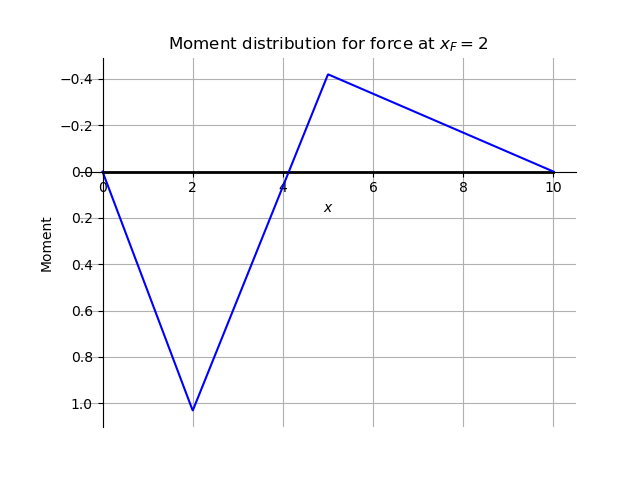

In [6]:
display(sym.simplify(M_subs.rewrite(sym.Piecewise)))
plt.figure()
x_plot = np.linspace(0,10,1000)
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.plot(x_plot,M_numpy(L1=5,L2=5,a=2,EI=5000,x=x_plot),color="blue")
plt.xlabel('$x$')
plt.ylabel('Moment')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Moment distribution for force at $x_F =  2 $'
axs.set_title(title0);
axs.spines['right'].set_color('none')
axs.spines['top'].set_color('none')
axs.spines['bottom'].set_position('zero')
axs.spines['left'].set_position('zero')
plt.show()

##  Finding influence line for M ##

Piecewise((x/10 - 1, x > 10), (-x**3/250 + 3*x**2/25 - 11*x/10 + 3, x > 5), (x**3/250 - x/2 + 2, x > 2), (x*(x**2 + 125)/250, x > 0), (x/2, True))

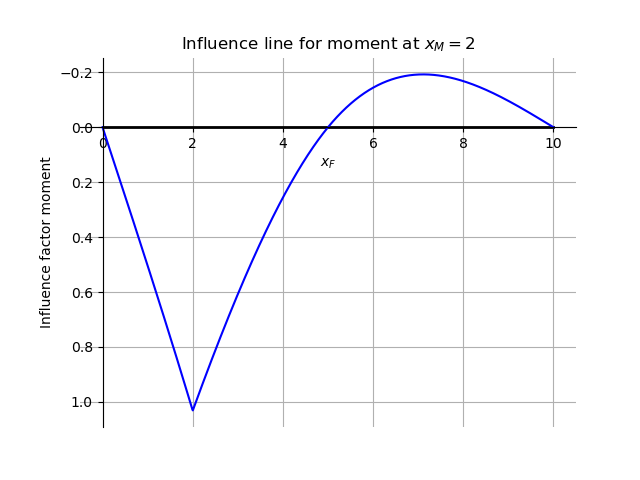

In [8]:
q = Bv * sym.SingularityFunction(x,L1,-1) - Av * sym.SingularityFunction(x,0,-1) - Cv * sym.SingularityFunction(x,L1+L2,-1)
C1, C2, C3, C4 = sym.symbols('C1, C2, C3, C4')
V = -sym.integrate(q,x)+C1
M = sym.integrate(V,x)+C2
kappa = M / EI
phi = sym.integrate(kappa,x)+C3 - sym.SingularityFunction(x,a,0)
w = sym.integrate(phi,x)+C4
eq1 = sym.Eq(w.subs(x,0),0)
eq2 = sym.Eq(w.subs(x,L1),0)
eq3 = sym.Eq(w.subs(x,L1+L2),0)
eq4 = sym.Eq(M.subs(x,0),0)
eq5 = sym.Eq(M.subs(x,L1+L2),0)
eq6 = sym.Eq(V.subs(x,-1),0)
eq7 = sym.Eq(V.subs(x,L1+L2+1),0)
sol = sym.solve([eq1,eq2,eq3,eq4,eq5,eq6,eq7],[C1,C2,C3,C4,Av,Bv,Cv])
w_sol = w.subs(sol)
w_subs = w_sol.subs([(L1,5),(L2,5),(a,2),(EI,5000)])
display(sym.simplify(w_subs.rewrite(sym.Piecewise)))
M_inf_numpy = sym.lambdify([L1,L2,a,EI,x],w_sol.rewrite(sym.Piecewise))


plt.figure()
x_plot = np.linspace(0,10,1000)
plt.plot([0,10],[0,0],color='black',linewidth=2)
plt.plot(x_plot,M_inf_numpy(L1=5,L2=5,a=2,EI=5000,x=x_plot),color="blue")
plt.xlabel('$x_F$')
plt.ylabel('Influence factor moment')
axs = plt.gca()
axs.grid()
axs.invert_yaxis()
title0 = 'Influence line for moment at $x_M = 2$'
axs.spines['right'].set_color('none')
axs.spines['top'].set_color('none')
axs.spines['bottom'].set_position('zero')
axs.spines['left'].set_position('zero')
axs.set_title(title0);
plt.show()

## Comparison M-line and influence line for moment at $x = ...$ #

interactive(children=(FloatSlider(value=2.0, description='Location moment x_M = ... (m)', layout=Layout(width=…

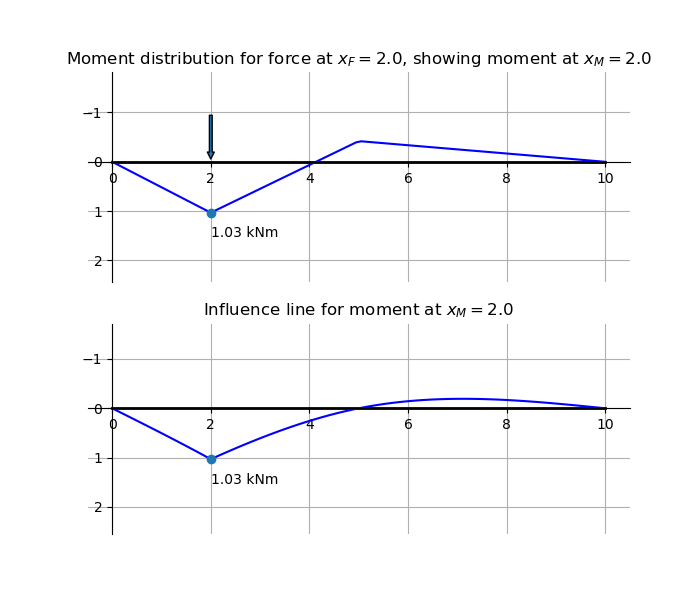

In [9]:
fig, axs = plt.subplots(2, 1, figsize=(7, 6))
x = np.linspace(0,10,100)
def func(a,b):
    axs[0].clear()  # Clear the existing plot
    axs[1].clear()
    axs[0].plot([0,10],[0,0],color='black',linewidth=2)
    axs[0].grid()
    axs[0].axis('equal')
    axs[0].plot(x,M_numpy(5,5,b,5000,x),color='blue')
    axs[0].plot(a,M_numpy(5,5,b,5000,a),marker='o')
    axs[0].annotate('%.2f kNm' % M_numpy(5,5,b,5000,a),xy = [a,M_numpy(5,5,b,5000,a)+0.5])
    axs[0].annotate(text='', xy=(b,0), xytext=(b,-1), arrowprops=dict(arrowstyle='simple'))
    axs[0].invert_yaxis()
    title0 = 'Moment distribution for force at $x_F = '+str(b)+'$, showing moment at $x_M = '+str(a)+'$'
    axs[0].set_title(title0)
    axs[1].plot([0,10],[0,0],color='black',linewidth=2)
    axs[1].grid()
    axs[1].axis('equal')
    axs[1].plot(x,M_inf_numpy(5,5,a,5000,x),color='blue')
    axs[1].plot(b,M_inf_numpy(5,5,a,5000,b),marker='o')
    axs[1].annotate('%.2f kNm' % M_inf_numpy(5,5,a,5000,b),xy = [b,M_inf_numpy(5,5,a,5000,b)+0.5])
    axs[1].invert_yaxis()
    title1 = 'Influence line for moment at $x_M = '+str(a)+'$'
    axs[1].set_title(title1)

    axs[0].spines['right'].set_color('none')
    axs[0].spines['top'].set_color('none')
    axs[0].spines['bottom'].set_position('zero')
    axs[0].spines['left'].set_position('zero')
    axs[1].spines['right'].set_color('none')
    axs[1].spines['top'].set_color('none')
    axs[1].spines['bottom'].set_position('zero')
    axs[1].spines['left'].set_position('zero')
    plt.draw()  

    
interact(func, a = widgets.FloatSlider(min=0, max=10, value=2, step=0.1, description="Location moment x_M = ... (m)",readout_format='.1f',style= {'description_width': '180px'},layout = {'width': '400px'}),
         b = widgets.FloatSlider(min=0, max=10, value=2, step=0.1, description="Location unit load x_F = ... (m)",readout_format='.1f',style= {'description_width': '180px'},layout = {'width': '400px'}) );